![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39123704-ea58fb38-46f8-11e8-883c-d01f27909c43.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: Marketing Analysis

Your homework for today is to clean, normalize and analyze a dataset gathered from shopping mall customers in the San Francisco Bay area. It's a survey done in 1987, so you might expect many data-entry related errors.

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Hands on! 

The dataset is contained in `data/marketing.csv` along with a file that describes the fields (`data/marketing-description.txt`).

What inconsistencies can you find? What are the fields with more issues? How can you transform the data to be expressed in a better way? What variables are related and at what extent?

All these are the questions that you should be asking and answering.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [41]:
sns.set(rc={'figure.figsize': (18, 6)})

---

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">1.</span>
            Load the dataset `data/marketing.csv` as a Pandas dataframe on a variable called `df`.
        </td>
    </tr>
</table>

We don't want you to get stuck with this step. Reading and parsing CSV's with incorrect structure, encoding or separators can be tedious. Only for this step, the solution is provided. Your job is to keep completing the cells that are empty and have the `Your code goes here` comment.

In [42]:
df = pd.read_csv('data/marketing.csv', sep=';')

In [43]:
df.head()

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,AnualIncome
1,2,1,5.0,4,5,5,3,3,0,Own,1,7,?,76004
2,Male,1,5.0,5,5,5,3,5,2,Own,1,7,1,76004
3,2,1,3.0,5,1,5,2,3,1,Rent,3,7,1,34000
4,2,5,1.0,2,6,5,1,4,2,Live with Parents/Family,1,7,1,9136
5,2,5,1.0,2,6,3,1,4,2,Live with Parents/Family,1,7,1,9136


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">2.</span>
            Check if there is any null value on the dataframe.
        </td>
    </tr>
</table>

> ⚠️ <i>Sometimes null values are represented by special characters, check <b>unique values</b> to find them.</i>

In [44]:
# Your code goes here

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 1 to 8993
Data columns (total 14 columns):
Sex                 8990 non-null object
MaritalStatus       8991 non-null object
Age                 8991 non-null float64
Education           8992 non-null object
Occupation          8981 non-null object
YearsInSf           8993 non-null object
DualIncome          8993 non-null int64
HouseholdMembers    8989 non-null object
Under18             8993 non-null int64
HouseholdStatus     8990 non-null object
TypeOfHome          8993 non-null object
EthnicClass         8989 non-null object
Language            8992 non-null object
AnualIncome         8987 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


Sex                  3
MaritalStatus        2
Age                  2
Education            1
Occupation          12
YearsInSf            0
DualIncome           0
HouseholdMembers     4
Under18              0
HouseholdStatus      3
TypeOfHome           0
EthnicClass          4
Language             1
AnualIncome          6
dtype: int64

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">3.</span>
            Remove the rows that contain invalid values.
        </td>
    </tr>
</table>

In [45]:
# Your code goes here

df = df.replace({'?': np.nan})

In [46]:
# unique value in sex

df['Sex'].unique().tolist()

['2', 'Male', '8', nan, '9']

In [47]:
# clean up Sex
df = df.replace({
    'Sex': {
        'Male': '1',
        '8': np.nan,
        '9': np.nan
    }
})

In [48]:
# drop Nan
# drop null values
df = df.dropna()

In [49]:
# check
df.isnull().any()

Sex                 False
MaritalStatus       False
Age                 False
Education           False
Occupation          False
YearsInSf           False
DualIncome          False
HouseholdMembers    False
Under18             False
HouseholdStatus     False
TypeOfHome          False
EthnicClass         False
Language            False
AnualIncome         False
dtype: bool

In [50]:
df.columns.unique()

Index(['Sex', 'MaritalStatus', 'Age', 'Education', 'Occupation', 'YearsInSf',
       'DualIncome', 'HouseholdMembers', 'Under18', 'HouseholdStatus',
       'TypeOfHome', 'EthnicClass', 'Language', 'AnualIncome'],
      dtype='object')

In [51]:
for column in df.columns:
    print('Column: {}, unique values: {}'.format(column, df[column].unique()))

Column: Sex, unique values: ['1' '2']
Column: MaritalStatus, unique values: ['1' '5' '3' '2' '4']
Column: Age, unique values: [5. 3. 1. 6. 2. 7. 4.]
Column: Education, unique values: ['5' '2' '4' '3' '6' '1']
Column: Occupation, unique values: ['5' '1' '6' '8' '9' '3' '2' '4' '7']
Column: YearsInSf, unique values: ['5' '3' '4' '2' '1']
Column: DualIncome, unique values: [3 2 1]
Column: HouseholdMembers, unique values: ['5' '3' '4' '2' '1' '6' '7' '9' '8']
Column: Under18, unique values: [2 1 0 3 4 5 6 8 7 9]
Column: HouseholdStatus, unique values: ['Own' 'Rent' 'Live with Parents/Family' 'Rental' 'Live with Parents'
 'Live with Family' 'Live with Fam']
Column: TypeOfHome, unique values: ['1' '3' '5' '2' '4']
Column: EthnicClass, unique values: ['7' '5' '2' '3' '4' '8' '1' '6']
Column: Language, unique values: ['1' '3' '2']
Column: AnualIncome, unique values: ['76004' '34000' '9136' '66994' '32171' '11703' '21672' '46894' '27591'
 '19997' '253600' '7' '7540' '91000000000036' '5740' '460

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">4.</span>
            Show <b>basic descriptive statistics</b> (mean, mix, max...) of the data.
        </td>
    </tr>
</table>

In [52]:
# Your code goes here
df.describe()


,Age,DualIncome,Under18
count,6845.000000,6845.000000,6845.000000
mean,3.407889,1.549744,0.688240
std,1.609857,0.737680,1.082828
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,0.000000
50%,3.000000,1.000000,0.000000
75%,4.000000,2.000000,1.000000
max,7.000000,3.000000,9.000000


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">5.</span>
            Show a boxplot of `AnualIncome` variable.
        </td>
    </tr>
</table>

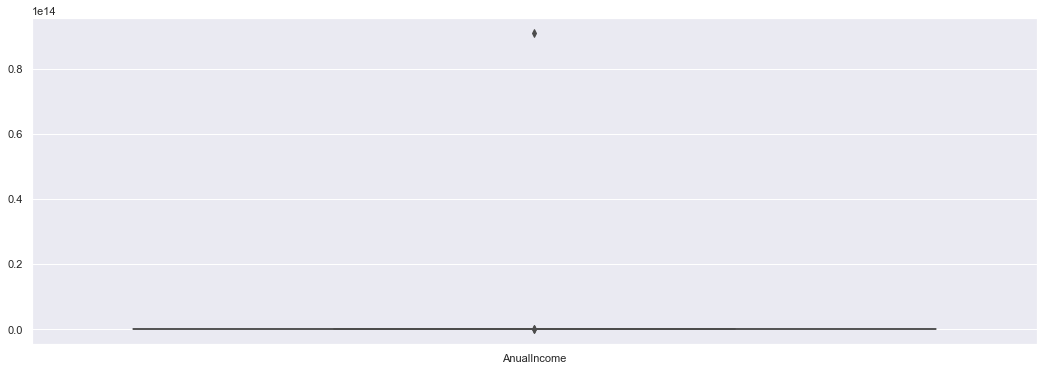

In [53]:
# Your code goes here
sns.boxplot(data=df['AnualIncome'].to_frame())


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">6.</span>
            Identify outlier values on `AnualIncome` and remove them.
        </td>
    </tr>
</table>

In [54]:
df['AnualIncome'].describe()

count     6845
unique      20
top       9136
freq      1246
Name: AnualIncome, dtype: object

In [64]:
df1= df['AnualIncome'].unique()



In [70]:
df1.sort()


In [71]:
df1

array(['11703', '150500', '19997', '21672', '2460', '253600', '27591',
       '32171', '34000', '460', '46894', '5740', '66994', '7', '7540',
       '75500', '76004', '91000000000036', '9136', '9460'], dtype=object)

In [72]:
# Your code goes here
outliers = ['91000000000036', '150500', '253600']
df = df.loc[~df['AnualIncome'].isin(outliers), :]


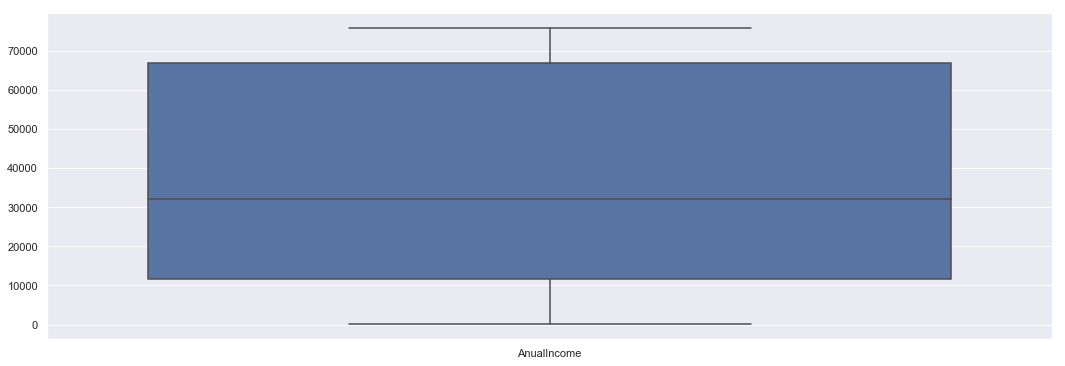

In [73]:
sns.boxplot(data=df['AnualIncome'].to_frame())

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">7.</span>
            Show two different `countplot` for `Sex` and `Education` variables.
        </td>
    </tr>
</table>

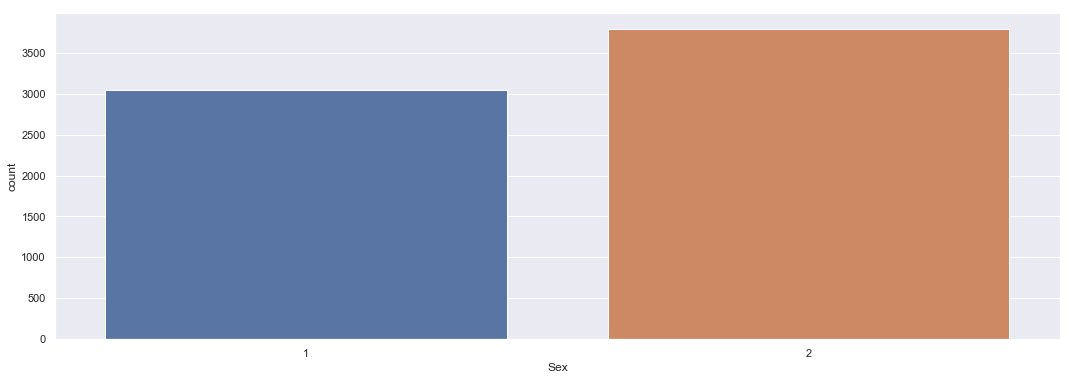

In [74]:
# Your code goes here
sns.countplot(data=df, x='Sex')


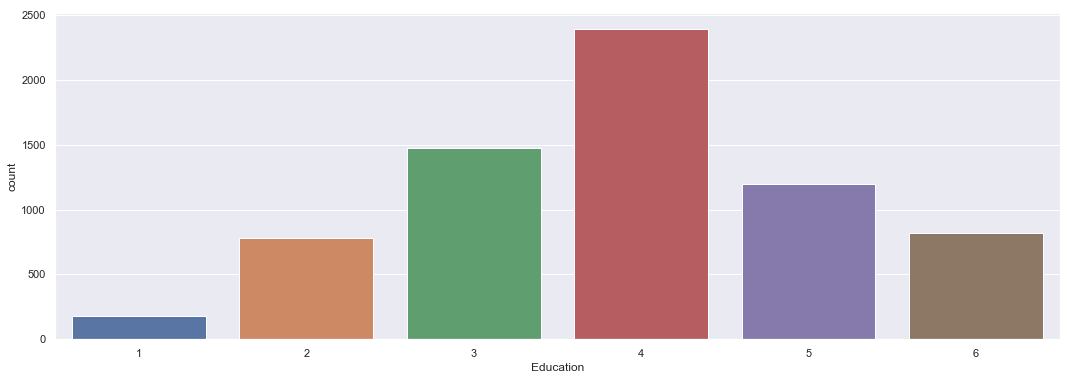

In [75]:
# Your code goes here

sns.countplot(data=df, x='Education')

---

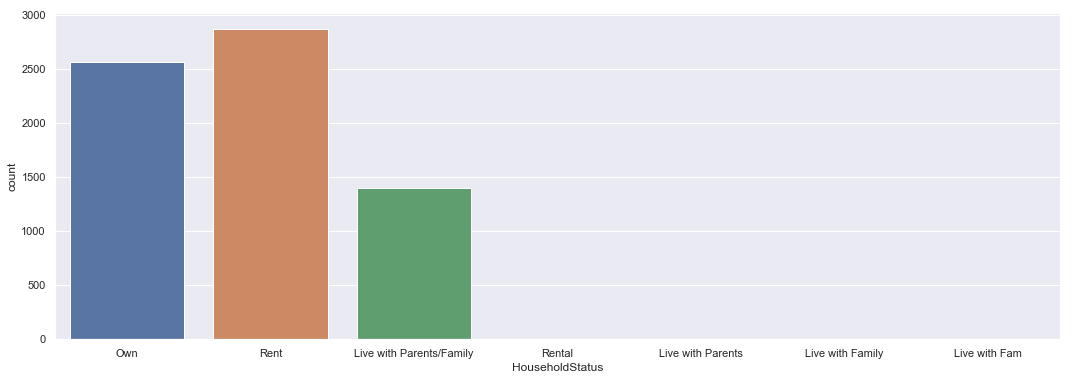

In [76]:
sns.countplot(data=df, x='HouseholdStatus')

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">8.</span>
            Show only `Sex` and `HouseholdStatus` of the first 20 observations.
        </td>
    </tr>
</table>

In [78]:
# Your code goes here

df.loc[:, ['Sex', 'HouseholdStatus']].head(20)

,Sex,HouseholdStatus
2,1,Own
3,2,Rent
4,2,Live with Parents/Family
5,2,Live with Parents/Family
6,1,Own
7,1,Rent
8,1,Rent
9,1,Rent
10,1,Rent
11,1,Rent


---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">9.</span>
            Show only `MaritalStatus` of the observations in position 247.
        </td>
    </tr>
</table>

In [82]:
# Your code goes here
df.iloc[247, :]


Sex                     1
MaritalStatus           1
Age                     3
Education               6
Occupation              1
YearsInSf               2
DualIncome              3
HouseholdMembers        2
Under18                 0
HouseholdStatus      Rent
TypeOfHome              1
EthnicClass             2
Language                3
AnualIncome         32171
Name: 328, dtype: object

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">10.</span>
            How many males answered the survey?
        </td>
    </tr>
</table>

In [85]:
# Your code goes here

df.loc[df['Sex'] == '1'].count()


Sex                 3049
MaritalStatus       3049
Age                 3049
Education           3049
Occupation          3049
YearsInSf           3049
DualIncome          3049
HouseholdMembers    3049
Under18             3049
HouseholdStatus     3049
TypeOfHome          3049
EthnicClass         3049
Language            3049
AnualIncome         3049
dtype: int64

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">11.</span>
            How many people "Live with Parents/Family"?
        </td>
    </tr>
</table>

> ⚠️ <i>Remember "Live with Parents/Family" is on `HouseholdStatus` column.</i>

In [89]:
# Your code goes here

df['HouseholdStatus'].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [94]:
df.loc[df['HouseholdStatus'] == 'Live with Parents/Family', :].count()

Sex                 1394
MaritalStatus       1394
Age                 1394
Education           1394
Occupation          1394
YearsInSf           1394
DualIncome          1394
HouseholdMembers    1394
Under18             1394
HouseholdStatus     1394
TypeOfHome          1394
EthnicClass         1394
Language            1394
AnualIncome         1394
dtype: int64

In [ ]:
# its 1394

---

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)

### Optional exercises

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">12.</span>
            What is the most common `EthnicClass`?
        </td>
    </tr>
</table>

In [95]:
# Your code goes here
df.groupby('EthnicClass')['EthnicClass'].count().sort_values(ascending=False)


EthnicClass
7    4577
5     870
3     630
2     379
8     175
1     111
6      88
4      12
Name: EthnicClass, dtype: int64

---

![separator1](https://user-images.githubusercontent.com/7065401/39119545-6d73d9aa-46ec-11e8-98d3-40204614f000.png)

<table style="width: 100%; border: 4px solid #00F;">
    <tr>
        <td width="80"><img src="https://user-images.githubusercontent.com/7065401/39122907-870d233a-46f6-11e8-84b1-ede5e3714362.png"></td>
        <td style="font-size: 14px; text-align: left">
            <span style="color: #00F; font-size: 20px; font-weight: 900; margin-right: 5px;">13.</span>
            Which occupation gets the highest anual income?
        </td>
    </tr>
</table>

In [96]:
# parse AnualIncome as int
df['AnualIncome'] = df['AnualIncome'].apply(int)

# Your code goes here

df.groupby('Occupation')['Occupation', 'AnualIncome'].sum().sort_values(by='AnualIncome', ascending=False)

,AnualIncome
Occupation,
1,112422062
4,26058933
6,22635572
5,20808179
2,20156323
8,17567999
3,17262711
9,5489970
7,4075155


![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)